In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio

import imageio
from PIL import Image, ImageSequence
from scipy import ndimage as ndi
from scipy.ndimage.morphology import binary_dilation, grey_dilation
from skimage.feature import canny
import skimage.measure as measure
from skimage.measure import label
from skimage.segmentation.boundaries import find_boundaries
from skimage.measure import regionprops
import cv2
from skimage.filters import sobel
from skimage.morphology import watershed

In [2]:
import sys
sys.path.append('../src')
from image_segmentation import *

In [3]:
# load all pages of tiff file
tiff_dir = '../data/15052019_algMono0.1_20190517_tiff/'
path = tiff_dir + os.listdir(tiff_dir)[11]
all_pages = open_tiff(path)

In [4]:
len(all_pages)

200

#### Chamber detection for first image

In [5]:
# scale pixel-values
img = all_pages[0]
img = scale_pixel_vals(img)

In [6]:
#image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = img.astype('uint8')
enhanced = cv2.equalizeHist(img)

In [7]:
# apply dilation and find contours at a constant value
# automatic detection of color value
#dilation = grey_dilation(enhanced, size=(20,20)) #size=(20,20)
contours = measure.find_contours(enhanced, 180, fully_connected='high')

In [8]:
# closed_shape_ix = np.where([(c[:,1][0] == c[:,1][-1])&(c[:,0][0] == c[:,0][-1])\
#                             for c in contours])[0]
# closed_shapes = [contours[ix] for ix in closed_shape_ix]

# #find the rectangular contour
# x_range_contours = np.array([np.max(c[:,1]) - np.min(c[:,1]) for c in closed_shapes])
# y_range_contours = np.array([np.max(c[:,0]) - np.min(c[:,0]) for c in closed_shapes])

# #assume chamber size is above a specific value
# ix = list(set(np.where(x_range_contours > 400)[0])&set(np.where(y_range_contours > 400)[0]))

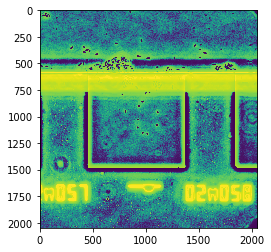

In [9]:
#plt.imshow(dilation)
#plt.plot(np.sum(dilation, axis = 1))
plt.imshow(enhanced)

In [10]:
# compute the range in x-direction for every contour and check for contours above a specific size
ix_rect = find_rectangle(contours, 700, 500)

In [11]:
# get the corners of the rectangle
corners = get_corners(contours[ix_rect])
rectangle_x, rectangle_y, range_x, range_y = draw_rectangle(corners)

corners_cut = get_corners(np.array([rectangle_y, rectangle_x]).T)
cutout = do_cutout(img, corners_cut)

Text(0.5, 1.0, 'Cutout')

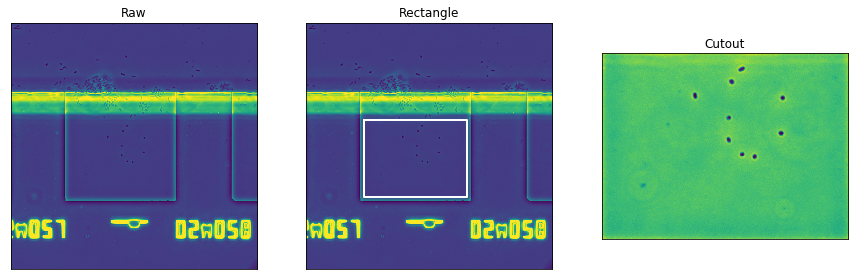

In [12]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Raw')
plt.subplot(1,3,2)
plt.imshow(img)
plt.plot(rectangle_x, rectangle_y, 'w', linewidth = 2)
plt.xticks([])
plt.yticks([])
plt.title('Rectangle')
plt.subplot(1,3,3)
plt.imshow(cutout)
plt.xticks([])
plt.yticks([])
plt.title('Cutout')

#### Chamber detection for all following images

In [13]:
# rescale pixel-values
img = all_pages[186]
img = scale_pixel_vals(img)

In [14]:
img = img.astype('uint8')
enhanced = cv2.equalizeHist(img)

In [15]:
# apply dilation and find contours at a constant value
# automatic detection of color value
#dilation = grey_dilation(enhanced, size=(20,20))
contours = measure.find_contours(enhanced, 180, fully_connected='high')

In [16]:
# x_range_contours = np.array([c[:,1] for c in contours])

# closed_rectangle_ix = np.where([c[:,1][0] == c[:,1][-1] for c in contours])[0]
# closed_rectangles = [contours[ix] for ix in closed_rectangle_ix]

# len(closed_rectangles)

In [17]:
# x_val = contours[40][:,1]
# #len(np.where(x_val == 0)[0])
# x_min_val = 0
# x_max_val = img.shape[0]
# y_min_val = 0
# y_max_val = img.shape[1]

In [18]:
# ix = 13
# plt.plot(contours[ix][:,1], contours[ix][:,0])
# (contours[ix][:,1][0] == contours[ix][:,1][-1])&(contours[ix][:,0][0] == contours[ix][:,0][-1])

In [19]:
# compute the range in x-direction for every contour and check for contours above a specific size
ix_rect = find_rectangle(contours, 700, 500)

In [20]:
# get the corners of the rectangle
corners = get_corners(contours[ix_rect])
rectangle_x, rectangle_y = draw_rectangle(corners, range_x, 
                                          range_y, first_image = False)
corners_cut = get_corners(np.array([rectangle_y, rectangle_x]).T)
cutout = do_cutout(img, corners_cut)

Text(0.5, 1.0, 'Cutout')

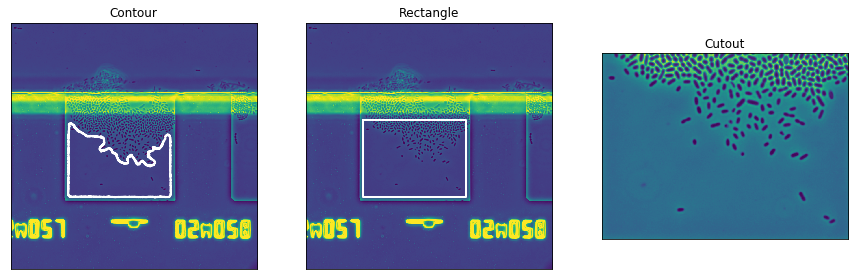

In [21]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Contour')
plt.plot(contours[ix_rect][:,1], contours[ix_rect][:,0], 'w', linewidth = 2)
plt.subplot(1,3,2)
plt.imshow(img)
plt.plot(rectangle_x, rectangle_y, 'w', linewidth = 2)
plt.xticks([])
plt.yticks([])
plt.title('Rectangle')
plt.subplot(1,3,3)
plt.imshow(cutout)
plt.xticks([])
plt.yticks([])
plt.title('Cutout')

#### Cutout all

In [ ]:
#path = tiff_dir + os.listdir(tiff_dir)[35]
all_cutouts = cutout_all_pages(path, 700, 400)

 28%|██▊       | 57/200 [01:24<02:52,  1.20s/it]

In [ ]:
plt.figure(figsize = (15,15))
for i, ac in enumerate(all_cutouts[::10]):
    plt.subplot(5,4,i+1)
    plt.imshow(ac)
    plt.xticks([])
    plt.yticks([])

In [ ]:
[ac.shape for ac in all_cutouts]

In [ ]:
# from skimage.filters import sobel
# from skimage.morphology import watershed
# elevation_map = sobel(data)

# markers = np.zeros_like(data)
# markers[data < 0.3] = 2
# markers[data > 0.4] = 1

# segmentation = watershed(elevation_map, markers)

# # plt.imshow(segmentation - 1)

# edges = canny(data)
# segm = ndi.binary_fill_holes(edges)

# label_objects, nb_labels = ndi.label(segm)
# sizes = np.bincount(label_objects.ravel())
# mask_sizes = sizes > 
# mask_sizes[0] = 0
# segm_cleaned = mask_sizes[label_objects]

# plt.figure(figsize=(15,15))
# plt.subplot(1,3,1)
# plt.imshow(all_cutouts[107])
# plt.subplot(1,3,2)
# plt.imshow(segm)
# plt.subplot(1,3,3)
# plt.imshow(segm_cleaned)

In [ ]:
all_segmentations = []
for data in all_cutouts:
    #data = data/np.max(data)
#     edges = canny(data)
#     segm = ndi.binary_fill_holes(edges)
    
#     label_objects, nb_labels = ndi.label(segm)
#     sizes = np.bincount(label_objects.ravel())
#     mask_sizes = sizes > 250
#     mask_sizes[0] = 0
#     segm_cleaned = mask_sizes[label_objects]

    elevation_map = sobel(data)

    markers = np.zeros_like(data)
    markers[data < 120] = 2
    markers[data > 40] = 1
    segm = watershed(elevation_map, markers)
    segm = ndi.binary_fill_holes(segm - 1)

    
#     seg_simple = np.zeros(data.shape)
#     seg_simple[data < 40]=1
    
    all_segmentations.append(segm)

In [ ]:
plt.figure(figsize = (15,15))
for i, ac in enumerate(all_segmentations[::10]):
    plt.subplot(5,4,i+1)
    plt.imshow(ac)
    plt.xticks([])
    plt.yticks([])

In [ ]:
all_segmentations = np.array(all_segmentations)
img_label = label(all_segmentations)
img_label

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

segm = all_segmentations[80]
img_label = label(segm.astype(bool))
bounds = find_boundaries(img_label)
np.unique(img_label)

image_label_overlay = label2rgb(img_label, image=segm)
# props = regionprops(bounds.astype(int))
# # len(props[0])
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
rects = []
for region in regionprops(img_label):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        if 0 in rects[0]:
            image_label_overlay[rects[0][0]:rects[0][2], rects[0][1]:rects[0][3]] = 0
        
        rects.append(region.bbox)
        ax.add_patch(rect)

#ax.set_axis_off()
plt.tight_layout()
plt.show()

IndentationError: expected an indented block (<ipython-input-29-8254b6bf06b5>, line 30)

In [ ]:
#0 in rects[0]
#image_label_overlay[rects[0][0]:rects[0][2], rects[0][1]:rects[0][3]]
plt.hist(image_label_overlay.flatten())

In [31]:
# data = all_cutouts[130]
# elevation_map = sobel(data)

# markers = np.zeros_like(data)
# markers[data < 120] = 2
# markers[data > 40] = 1
# segm = watershed(elevation_map, markers)
# segm = ndi.binary_fill_holes(segm - 1)
# plt.imshow(segm)

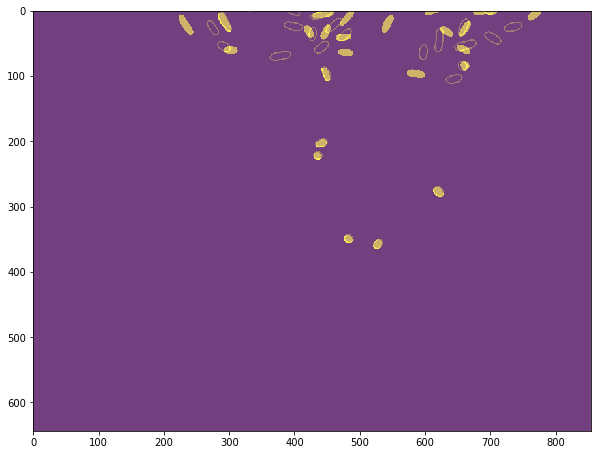

In [32]:
img_label = label(all_segmentations[90].astype(bool))
bounds = find_boundaries(img_label)

plt.figure(figsize=(10,10))
plt.imshow(bounds, alpha = 0.5)
plt.imshow(all_segmentations[91], alpha = 0.5)

In [33]:
from PIL import Image
# all_segs_to_save = np.array([seg.astype(int) for seg in all_segmentations])
# im = Image.fromarray(all_segs_to_save)
# im.save('test.tif')

imlist = []
for m in all_segmentations:
    imlist.append(Image.fromarray(m))

imlist[0].save("test.tif", compression="tiff_deflate", save_all=True,
               append_images=imlist[1:])

#### Save all cutouts and segmentations

In [34]:
data_dir = '../data/15052019_algMono0.1_20190517_segm/'

In [35]:
# Save all pages to separate tif-files
im_dir = data_dir + 'raw_im/' 
fname_base = 'CWRt' 
for i, p in enumerate(all_pages):
    filename = im_dir + fname_base + str('{:05}'.format(i+1)) + 'xy001c1.tif'
    img = Image.fromarray(p)
    img.save(filename)

In [36]:
# generate one tif-file per timeframe for cutouts
phase_dir = data_dir + 'xy1/phase/'
fname_base = 'CWRt' 
for i, cut in enumerate(all_cutouts):
    filename = phase_dir + fname_base + str('{:05}'.format(i+1)) + 'xy001c1.tif'
    img = Image.fromarray(cut)
    img.save(filename)

In [37]:
class mylist:

    def __init__(self, l):
        self.l=l

    def __repr__(self): 
        return repr(self.l)

    def append(self, x):
        self.l.append(x)

In [38]:
# generate one mat-file per timeframe for segmentation images

# mname = segm_dir + os.path.splitext(os.path.basename(path))[0]
# sio.savemat(mname,{'ar' : np.array(all_cutouts)})

# seg_dir = data_dir + 'xy1/seg/'
# fname_base = 'CWRt' 
# for i, seg in enumerate(all_segmentations):
#     filename = seg_dir + fname_base + str('{:05}'.format(i+1)) + 'xy001_err'
#     sio.savemat(filename,{'mask_cell' : seg.astype(bool)})
#     filename = seg_dir + fname_base + str('{:05}'.format(i+1)) + 'xy001_seg'
#     sio.savemat(filename,{'mask_cell' : seg.astype(bool)})

seg_dir = data_dir + 'xy1/seg/'
fname_base = 'CWRt' 
ix = 0
for ph, seg in zip(all_cutouts, all_segmentations):
    
    #phase images
    phase = ph
     
    phase_centr = ph - ph.mean(axis=0)
    phase_norm = phase_centr / np.abs(phase_centr).max(axis=0)
    
    # mask background
    mask_bg = np.where(((seg * 1)<1),0,1).astype('uint8')
    
    # labeling of segmentations
    img_label = label(seg.astype(bool))
    bounds = find_boundaries(img_label)
    score = np.ones(np.max(img_label)).astype(int)
    scoreRaw = score * 50
    
    # detect and count all cells in image
    num_regs = np.max(img_label)#int(len(np.unique(img_label)))
    bin_ar = np.zeros(num_regs)
    
    props = regionprops(img_label)
#    BoundingBox = np.zeros(1, dtype = [(str(i+1), float, (1,4)) for i in range(num_regs)])
#     BoundingBox = np.zeros(1, dtype = [(str(i+1), float, (1,4)) for i in range(num_regs)])

    properties = []
    for i, p in enumerate(props):
#         bb_start = p.bbox[:2] 
#         bb_size = np.array(p.bbox[2:]) - np.array(p.bbox[:2])
#         bb = list(np.append(np.array(bb_start), bb_size))
        #BoundingBox[str(i+1)] = bb
        #p.zeros(1, dtype = [(str(i), float, (2, 2)) for i in range(3)])
#         bb_dict = dict()
#         bb_dict['BoundingBox'] = tuple(bb)

        min_col = p.bbox[1]
        min_row = p.bbox[0]
        diff_col = p.bbox[3] - p.bbox[1]
        diff_row = p.bbox[2] - p.bbox[0]
        bb = tuple([min_col+1, min_row+1, diff_col+1, diff_row+1])

#         x = mylist(bb)
#         bb_ar = np.array([x])
    
        bb_dict = np.zeros(1, dtype = [('Area', int, (1, 1)), ('BoundingBox', float, (1, 4))])
        bb_dict['Area'] = p.area
        bb_dict['BoundingBox'] = bb
        
        #bb = [[b] for b in bb]
        properties.append(bb_dict)
        #sorted(set(bb), key=list(bb).index)
        #BoundingBox['BoundingBox'] = list(bb)
    #BoundingBox = BoundingBox
    
    # vars to be defined
    mask_cell = (mask_bg - bounds - seg) > 0
    
    # image size and values
    min_col_bb = np.min([p[0][1][0][0] for p in properties])
    min_row_bb = np.min([p[0][1][0][1] for p in properties])

    max_col_bb = np.max([p[0][1][0][0] for p in properties])
    max_row_bb = np.max([p[0][1][0][1] for p in properties])

    crop_box = np.array([[min_row_bb, min_col_bb, max_row_bb, max_col_bb]]).astype(int)
#     crop_box = (0, 0) + (phase.shape)
    imRange = np.array([phase.min(), phase.max()])
    
#     # save as mat file
#     filename = seg_dir + fname_base + str('{:05}'.format(i+1)) + 'xy001_err'
#     sio.savemat(filename,{'phase' : phase, 'mask_bg' : mask_bg, 'mask_cell' : mask_cell.astype(bool),
#                           'phaseNorm' : phase_norm, 'crop_box' : crop_box,
#                           'segs' : {'segs_good' : seg.astype(bool), 'segs_3n' : bounds.astype(bool),
#                                     'segs_label' : img_label.astype(bool), 'score' : score, 'scoreRaw' : scoreRaw},
#                           'regs' : {'regs_label' : img_label, 'num_regs' : num_regs, 'score' : score,
#                                     'scoreRaw' : scoreRaw}})
    
    filename = seg_dir + fname_base + str('{:05}'.format(ix+1)) + 'xy001_seg'
    sio.savemat(filename,{'phase' : phase, 'mask_bg' : mask_bg.astype(float), 'mask_cell' : mask_cell.astype(bool), 
                          'crop_box' : crop_box,
                          'segs' : {'segs_good' : seg.astype(bool), 'segs_3n' : bounds.astype(bool),
                                                 'segs_label' : img_label.astype(bool), 'score' : score,
                                                 'scoreRaw' : scoreRaw, 'segs_bad' : seg.astype(bool)},
                          'regs' : {'regs_label' : img_label.astype(float), 'num_regs' : num_regs, 'score' : score,
                                                 'scoreRaw' : scoreRaw, 
                                    'props' :  properties}})
    
# , 'imRange' : imRange
# , 'phaseNorm' : phase_norm
# , 'C2phaseThresh' : bounds   
    
#     # save as mat file
#     sio.savemat(filename,{'phase' : ph.astype(bool), 'mask_bg' : seg.astype(bool), 
#                           'mask_colonies' : seg.astype(bool), 'mask_cell' : seg.astype(bool), 
#                           'regs' : {'regs_label' : seg.astype(bool), 'num_regs' : num_regs, 
#                           'divide' : [bin_ar], 'ehist' : bin_ar, 'stat0' : bin_ar}})
    
#     filename = seg_dir + fname_base + str('{:05}'.format(i+1)) + 'xy001_seg'
#     sio.savemat(filename,{'phase' : ph.astype(bool), 'mask_bg' : seg.astype(bool), 
#                           'mask_colonies' : seg.astype(bool), 'mask_cell' : seg.astype(bool), 
#                           'segs' : {'segs_3n' : bounds.astype(bool), 'segs_label' : seg.astype(bool)},
#                           'regs' : {'regs_label' : seg.astype(bool), 
#                           'num_regs' : num_regs, 'divide' : [bin_ar], 'ehist' : bin_ar, 'stat0' : bin_ar}})
    
    ix+=1

In [39]:
filename = seg_dir + '.doSegFull'
sio.savemat(filename, {})

In [49]:
bb+1

TypeError: can only concatenate tuple (not "int") to tuple

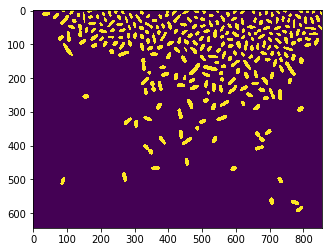

In [47]:
label_objects, nb_labels = ndi.label(seg)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 50
mask_sizes[0] = 0
coins_cleaned = mask_sizes[label_objects]
plt.imshow(coins_cleaned)

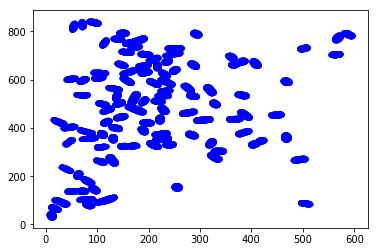

In [81]:
ix_cells = np.array([p.area for p in props]) > 200
prop_cells = np.array([p.coords for p in props])[ix_cells]

plt.figure()
for pc in prop_cells:
    plt.plot(pc[:,0], pc[:,1], 'b.')

In [ ]:
len(np.where(ix_cells == True)[0])

In [ ]:
seg

In [ ]:
plt.scatter(props[50].coords[:,0], props[50].coords[:,1])

In [ ]:
[p[0][0][0] for p in properties]

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(bounds[36:36+27,595:595+18])

In [ ]:
# min_col = p.bbox[1]
# min_row = p.bbox[0]
# diff_col = p.bbox[3] - p.bbox[1]
# diff_row = p.bbox[2] - p.bbox[0]
# tuple([min_col, min_row, diff_col, diff_row])

# min_col_bb = np.min([p[0][1][0][0] for p in properties])
# min_row_bb = np.min([p[0][1][0][1] for p in properties])

# max_col_bb = np.max([p[0][1][0][0] for p in properties])
# max_row_bb = np.max([p[0][1][0][1] for p in properties])

# np.array([[min_row_bb, min_col_bb, max_row_bb, max_col_bb]]).astype(int)

In [ ]:
imRange

In [ ]:
lib = sio.loadmat('../data/supersegger_test/xy1/seg/CWRt00001xy001_seg.mat')
lib['regs']['props'][0][0][0]